In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [3]:
df=pd.read_csv('/content/drive/MyDrive/QuoraCaseStudy/final_features_new.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,344_y,345_y,346_y,347_y,348_y,349_y,350_y,351_y,352_y,353_y,354_y,355_y,356_y,357_y,358_y,359_y,360_y,361_y,362_y,363_y,364_y,365_y,366_y,367_y,368_y,369_y,370_y,371_y,372_y,373_y,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,0,12,113,113,1,0.666644,0.666644,0.666644,0.499988,0.666656,0.571420,1.0,0.0,1.0,6.5,80,73,80,79,0.466667,2,5,29,33,6,7,4.0,13.0,0.307692,7,3,36.089226,37.321504,29.144426,7.243318,-4.393091,33.936893,-39.788110,-31.281802,7.549915,...,2.878220,0.272011,-7.225237,5.702226,7.818323,-0.971915,-7.661868,-3.698809,-7.187351,0.929977,7.693886,4.606387,-1.753408,-5.343594,-1.575277,-15.956231,-4.745490,3.690236,-0.450347,3.777231,-6.330956,-4.979339,-4.644689,6.044652,14.641375,5.513643,-2.691505,0.827176,0.523739,3.567624,7.823971,9.480327,3.019689,-4.512132,5.507996,-1.394699,-6.774182,19.559303,10.999301,1.221118
1,1,31,269,269,1,0.499975,0.333322,0.199996,0.166664,0.285710,0.199998,0.0,0.0,3.0,8.5,71,67,45,52,0.228571,2,1,34,44,7,10,2.0,16.0,0.125000,3,1,28.970019,55.190763,-3.439142,122.026494,0.387954,-32.402900,-54.161189,-21.403197,52.008618,...,-15.803058,-3.877333,-19.454198,15.159778,12.216688,-4.666707,-14.696038,12.642825,-14.563661,8.094001,1.800851,5.562550,4.024292,-13.223835,-3.296396,-13.703513,-20.119686,10.982169,6.457144,2.270749,-23.505361,-9.643767,6.124984,2.003229,25.785652,15.850659,-14.465373,6.577439,-4.012303,-2.826966,10.019150,10.862992,16.744674,-7.803665,10.473718,8.722070,-7.873836,-1.230693,5.577273,11.393325
2,2,37,297,297,0,0.000000,0.000000,0.199996,0.124998,0.071428,0.071428,0.0,1.0,0.0,14.0,50,50,45,46,0.078125,1,1,63,85,14,14,1.0,28.0,0.035714,2,0,-41.564828,15.531368,43.298950,48.970698,41.848233,67.197365,-50.401859,-136.119813,-8.022045,...,-17.824542,-1.694321,-53.243409,24.280204,36.645836,0.628280,3.658841,1.904225,-26.678794,15.038490,-9.424622,-44.151868,-4.324283,-34.189251,-12.990458,-36.304677,-30.207204,30.716391,21.651121,16.891292,-37.583383,-20.897536,-5.470684,-10.802751,53.304418,17.189052,-9.828215,11.991045,-6.456103,-8.095182,10.148813,39.813772,10.459571,-9.105431,22.593610,-2.586460,-26.310652,5.209890,14.405409,1.973262
3,3,49,405,405,1,0.333322,0.333322,0.333322,0.333322,0.333328,0.333328,0.0,0.0,0.0,6.0,58,58,46,50,0.242424,1,5,35,32,6,6,2.0,12.0,0.166667,6,4,58.652026,14.872357,52.078991,59.851403,18.322561,0.306313,-52.518414,-14.490990,58.565205,...,-11.108245,3.313792,-15.286068,8.647973,26.721594,-0.085266,1.673727,9.676763,-10.004607,7.977737,9.868582,-11.380592,-6.374474,-18.737871,-3.103435,-11.411558,-10.545094,11.298049,-1.645709,7.965899,-17.946025,5.117968,3.769195,2.228787,16.879449,10.589425,-12.475264,10.200239,-8.252563,-5.984820,4.040714,9.765749,8.131267,-5.868648,9.321126,2.971572,-10.537726,16.126495,11.157077,-1.287882
4,4,63,506,506,1,0.833319,0.833319,0.499975,0.249994,0.749991,0.599994,1.0,0.0,2.0,9.0,84,71,75,81,0.439024,1,4,40,47,8,10,6.0,18.0,0.333333,5,3,67.176042,53.503036,39.054041,157.508146,-80.203577,186.085929,-130.478503,-36.318731,95.654190,...,-10.734528,7.531572,-38.745773,17.329306,39.961332,-17.164085,-17.505557,14.679498,-29.738267,13.288886,18.957636,-18.104379,17.510745,-25.143003,2.925587,-30.195664,-4.771986,10.954731,10.410444,0.635490,-26.419624,-4.707379,-2.075692,-12.784942,35.833825,7.123780,-4.450113,-2.562439,-8.572697,2.279545,0.416459,17.829344,10.730372,-3.205848,4.783259,7.049612,-13.999205,14.959773,5.912719,14.343697


In [4]:
df.drop(df.index[0], inplace=True)
y_true = df['is_duplicate']
df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1', 'id','is_duplicate'], axis=1, inplace=True)

In [5]:
df.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,344_y,345_y,346_y,347_y,348_y,349_y,350_y,351_y,352_y,353_y,354_y,355_y,356_y,357_y,358_y,359_y,360_y,361_y,362_y,363_y,364_y,365_y,366_y,367_y,368_y,369_y,370_y,371_y,372_y,373_y,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.499975,0.333322,0.199996,0.166664,0.285710,0.199998,0.0,0.0,3.0,8.5,71,67,45,52,0.228571,2,1,34,44,7,10,2.0,16.0,0.125000,3,1,28.970019,55.190763,-3.439142,122.026494,0.387954,-32.402900,-54.161189,-21.403197,52.008618,11.498280,30.855965,-28.208475,-8.988714,-0.830142,...,-15.803058,-3.877333,-19.454198,15.159778,12.216688,-4.666707,-14.696038,12.642825,-14.563661,8.094001,1.800851,5.562550,4.024292,-13.223835,-3.296396,-13.703513,-20.119686,10.982169,6.457144,2.270749,-23.505361,-9.643767,6.124984,2.003229,25.785652,15.850659,-14.465373,6.577439,-4.012303,-2.826966,10.019150,10.862992,16.744674,-7.803665,10.473718,8.722070,-7.873836,-1.230693,5.577273,11.393325
2,0.000000,0.000000,0.199996,0.124998,0.071428,0.071428,0.0,1.0,0.0,14.0,50,50,45,46,0.078125,1,1,63,85,14,14,1.0,28.0,0.035714,2,0,-41.564828,15.531368,43.298950,48.970698,41.848233,67.197365,-50.401859,-136.119813,-8.022045,-31.177260,-68.576224,-26.853419,45.028398,-34.584430,...,-17.824542,-1.694321,-53.243409,24.280204,36.645836,0.628280,3.658841,1.904225,-26.678794,15.038490,-9.424622,-44.151868,-4.324283,-34.189251,-12.990458,-36.304677,-30.207204,30.716391,21.651121,16.891292,-37.583383,-20.897536,-5.470684,-10.802751,53.304418,17.189052,-9.828215,11.991045,-6.456103,-8.095182,10.148813,39.813772,10.459571,-9.105431,22.593610,-2.586460,-26.310652,5.209890,14.405409,1.973262
3,0.333322,0.333322,0.333322,0.333322,0.333328,0.333328,0.0,0.0,0.0,6.0,58,58,46,50,0.242424,1,5,35,32,6,6,2.0,12.0,0.166667,6,4,58.652026,14.872357,52.078991,59.851403,18.322561,0.306313,-52.518414,-14.490990,58.565205,-10.850536,0.642168,-41.632491,67.690272,-8.271640,...,-11.108245,3.313792,-15.286068,8.647973,26.721594,-0.085266,1.673727,9.676763,-10.004607,7.977737,9.868582,-11.380592,-6.374474,-18.737871,-3.103435,-11.411558,-10.545094,11.298049,-1.645709,7.965899,-17.946025,5.117968,3.769195,2.228787,16.879449,10.589425,-12.475264,10.200239,-8.252563,-5.984820,4.040714,9.765749,8.131267,-5.868648,9.321126,2.971572,-10.537726,16.126495,11.157077,-1.287882
4,0.833319,0.833319,0.499975,0.249994,0.749991,0.599994,1.0,0.0,2.0,9.0,84,71,75,81,0.439024,1,4,40,47,8,10,6.0,18.0,0.333333,5,3,67.176042,53.503036,39.054041,157.508146,-80.203577,186.085929,-130.478503,-36.318731,95.654190,81.932967,80.625476,-47.111812,-43.599829,-30.465590,...,-10.734528,7.531572,-38.745773,17.329306,39.961332,-17.164085,-17.505557,14.679498,-29.738267,13.288886,18.957636,-18.104379,17.510745,-25.143003,2.925587,-30.195664,-4.771986,10.954731,10.410444,0.635490,-26.419624,-4.707379,-2.075692,-12.784942,35.833825,7.123780,-4.450113,-2.562439,-8.572697,2.279545,0.416459,17.829344,10.730372,-3.205848,4.783259,7.049612,-13.999205,14.959773,5.912719,14.343697
5,0.799984,0.799984,0.749981,0.749981,0.777769,0.777769,1.0,1.0,0.0,9.0,91,82,87,86,0.540000,2,1,50,49,9,9,7.0,18.0,0.388889,3,1,8.535853,0.989147,44.895597,55.751177,42.348569,8.935557,-49.398774,-18.241754,-10.830176,42.327095,36.396007,-33.488660,16.753108,6.478728,...,-11.356416,-7.672554,-12.494188,15.780762,23.766342,0.967591,-5.858682,1.307838,-24.214241,9.090539,16.657734,-11.826822,-2.591202,-10.990012,-1.607058,-17.597053,-10.937058,9.510174,19.495196,14.924501,-20.883770,-4.497846,-5.658789,-5.122236,16.744987,10.623782,-9.458893,3.816986,-8.106711,-13.037895,5.277066,7.066415,0.576779,-4.524019,17.005295,6.740408,-6.564480,7.811521,7.587021,1.792800


#Converting string to numerics 

In [6]:
data=df
cols=list(data.columns)
for i in cols:
  data[i]=data[i].apply(pd.to_numeric)
  print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [7]:
y_true=list(map(int,y_true.values))



#Random train test split(70:30)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(data,y_true,stratify=y_true,test_size=0.3)

In [9]:
print("number of data points in train data: ",X_train.shape)
print("number of data points in test data: ",X_test.shape)

number of data points in train data:  (59002, 794)
number of data points in test data:  (25287, 794)


In [10]:
print("-"*10,"Distribution of output variable in train data","-"*10)
train_distr=Counter(y_train)
train_len=len(y_train)
print("class 0: ",int(train_distr[0])/train_len,"Class 1: ",int(train_distr[1])/train_len)
print("-"*10,"Distribution of output variable in train data","-"*10)
test_distr=Counter(y_test)
test_len=len(y_test)
print("Class 0:",int(test_distr[1])/test_len,"Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
class 0:  0.6392495169655266 Class 1:  0.36075048303447343
---------- Distribution of output variable in train data ----------
Class 0: 0.3607387195001384 Class 1:  0.3607387195001384


In [11]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

#Building a random mode(Finding worst-case log-loss)

In [ ]:
predicted_y

array([1, 1, 0, ..., 0, 0, 0])

Log loss on Test Data using Random Model 0.8907445227842534


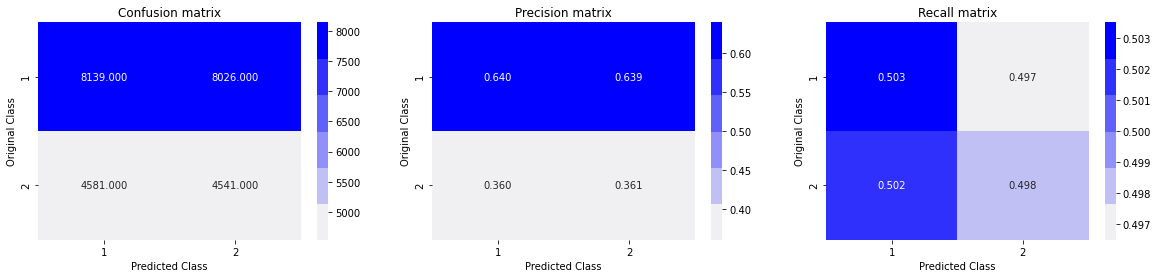

In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

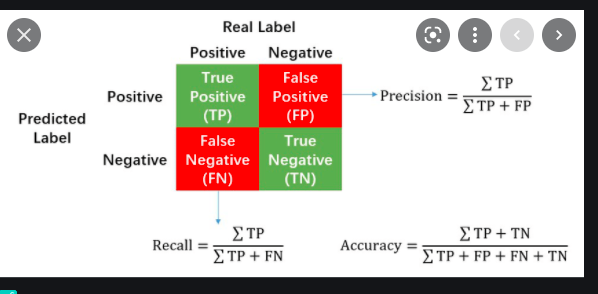

#Logistic Regression with hyperparametr tuning

In [ ]:
alpha=[10 ** x for x in range(-5,2)] #hyperparameter fpr sgd  
alpha

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]

In [ ]:
log_error_array=[]
for i in alpha:
  clf=SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=42)
  clf.fit(X_train,y_train)
  sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(X_train,y_train)
  predict_y=sig_clf.predict_proba(X_test)
  log_error_array.append(log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))
  print('for values of alpha = ',i,"The log loss is :",log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))



for values of alpha =  1e-05 The log loss is : 0.6538420463131214
for values of alpha =  0.0001 The log loss is : 0.4486001880705128
for values of alpha =  0.001 The log loss is : 0.4509806680182118
for values of alpha =  0.01 The log loss is : 0.44663395536616063
for values of alpha =  0.1 The log loss is : 0.4474569992228131
for values of alpha =  1 The log loss is : 0.4729032703089569
for values of alpha =  10 The log loss is : 0.5091716194665421


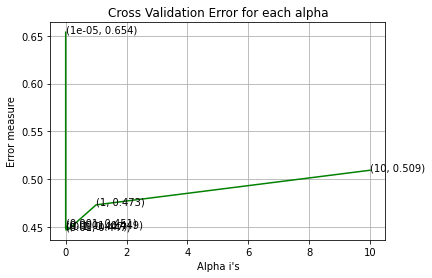

In [ ]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



For values of best alpha =  0.01 The train log loss is: 0.43508243379704703
For values of best alpha =  0.01 The test log loss is :  0.44663395536616063
Total number of data points :  25287


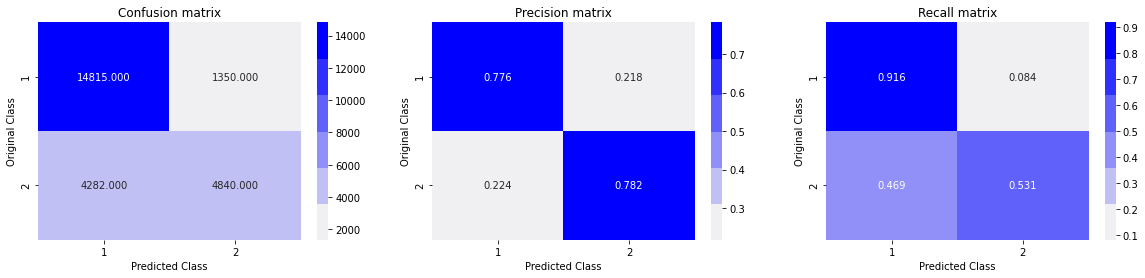

In [ ]:
best_alpha=np.argmin(log_error_array)
clf=SGDClassifier(alpha=alpha[best_alpha],penalty='l2',loss='log',random_state=42)
clf.fit(X_train,y_train)
sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
sig_clf.fit(X_train,y_train)

predict_y=sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y=sig_clf.predict_proba(X_test)
print('For values of best alpha = ',alpha[best_alpha],"The test log loss is : ",log_loss(y_test,predict_y,labels=clf.classes_, eps=1e-15))
predicted_y=np.argmax(predict_y,axis=1)
print("Total number of data points : ",len(predicted_y))
plot_confusion_matrix(y_test,predicted_y)

#Linear SVM with hyper parameter

In [ ]:
alpha=[10 ** x for x in range(-5,2)] #hyperparameter fpr sgd  
log_error_array=[]
for i in alpha:
  clf=SGDClassifier(alpha=i,penalty='l2',loss='hinge',random_state=42)
  clf.fit(X_train,y_train)
  sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
  sig_clf.fit(X_train,y_train)
  predict_y=sig_clf.predict_proba(X_test)
  log_error_array.append(log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))
  print('for values of alpha = ',i,"The log loss is :",log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))



for values of alpha =  1e-05 The log loss is : 0.5941984296564871
for values of alpha =  0.0001 The log loss is : 0.45276488415220323
for values of alpha =  0.001 The log loss is : 0.44607579979972944
for values of alpha =  0.01 The log loss is : 0.45523553789235255
for values of alpha =  0.1 The log loss is : 0.45082556915513655
for values of alpha =  1 The log loss is : 0.46076897294019403
for values of alpha =  10 The log loss is : 0.4974162697993417


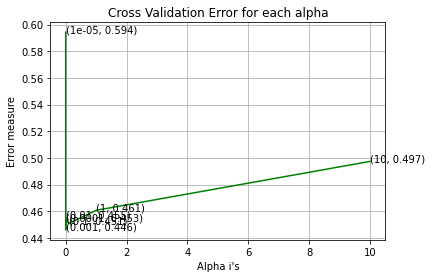

In [ ]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  0.001 The train log loss is: 0.6538487751253073
For values of best alpha =  0.001 The test log loss is: 0.6538420463131214
Total number of data points : 25287


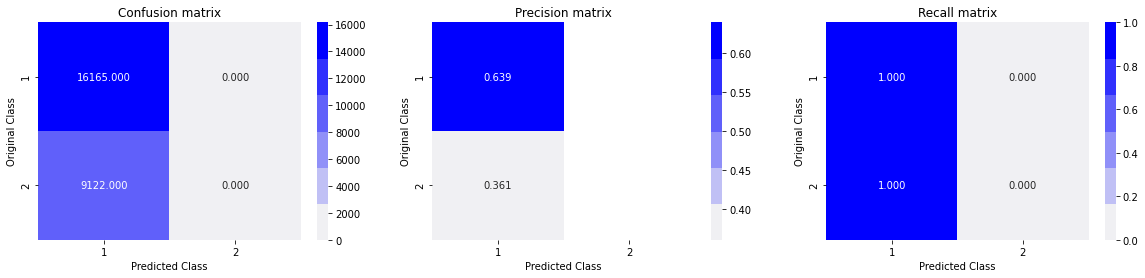

In [ ]:

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

#XgBoost

In [ ]:
import xgboost as xgb
params={}
params['objective']='binary:logistic'
params['eval_metric']='logloss'
params['eta']=0.02
params['max_depth']=4

d_train=xgb.DMatrix(X_train,label=y_train)
d_test=xgb.DMatrix(X_test,label=y_test)

watchlist=[(d_train,'train'),(d_test,'valid')]
bst=xgb.train(params,d_train,400,watchlist,early_stopping_rounds=20,verbose_eval=10)
xgdmat=xgb.DMatrix(X_train,y_train)
predict_y=bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684875	valid-logloss:0.684834
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.615473	valid-logloss:0.615532
[20]	train-logloss:0.563874	valid-logloss:0.564173
[30]	train-logloss:0.525648	valid-logloss:0.526231
[40]	train-logloss:0.496071	valid-logloss:0.497142
[50]	train-logloss:0.47286	valid-logloss:0.474125
[60]	train-logloss:0.454427	valid-logloss:0.456091
[70]	train-logloss:0.43929	valid-logloss:0.441401
[80]	train-logloss:0.427291	valid-logloss:0.429777
[90]	train-logloss:0.417603	valid-logloss:0.420445
[100]	train-logloss:0.409283	valid-logloss:0.412515
[110]	train-logloss:0.402391	valid-logloss:0.405938
[120]	train-logloss:0.396661	valid-logloss:0.40048
[130]	train-logloss:0.391975	valid-logloss:0.396018
[140]	train-logloss:0.387693	valid-logloss:0.392004
[150]	train-logloss:0.384071	valid-logloss:0.388588
[160]	train-logloss:0.380923	va

Total number of data points : 25287


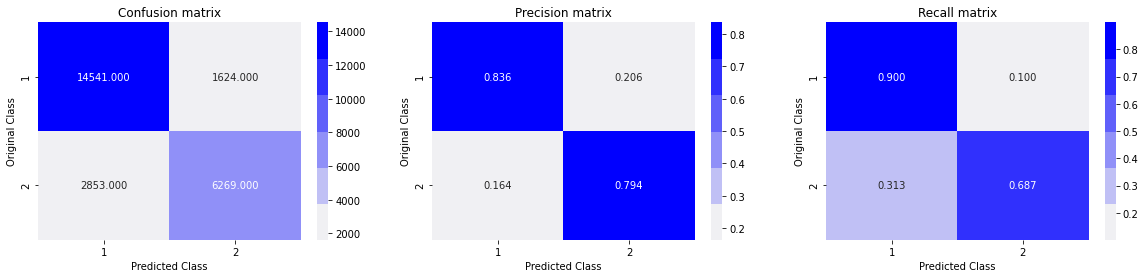

In [ ]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
#hyper parameter tuning xgboost WITH RANDOMSEARCHCV
#https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
param_grid = {
        'silent': [False],
        'max_depth': [4, 10],
        'learning_rate': [0.001, 0.01, 0.1],
        'subsample': [0.5, 0.6],
        'colsample_bytree': [0.4, 0.5],
        'colsample_bylevel': [0.4, 0.5],
        'min_child_weight': [0.5, 1.0],
        'gamma': [0.25, 0.5],
        'reg_lambda': [0.1,5.0,50.0],
        'n_estimators': [100]}

In [ ]:
param_grid = {
        'max_depth': [4, 10],
        'learning_rate': [0.001, 0.01, 0.1],
        'n_estimators': [100]}

In [ ]:
param_grid

{'learning_rate': [0.001, 0.01, 0.1],
 'max_depth': [4, 10],
 'n_estimators': [100]}

In [ ]:
fit_params = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 10,
              'eval_set': [(X_train, y_train)]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf = xgb.XGBClassifier()
rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=False, random_state=42)
print("Randomized search..")

Randomized search..


In [ ]:
rs_clf.fit(X_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] n_estimators=100, max_depth=4, learning_rate=0.001 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, max_depth=4, learning_rate=0.001, total= 3.2min
[CV] n_estimators=100, max_depth=4, learning_rate=0.001 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV]  n_estimators=100, max_depth=4, learning_rate=0.001, total= 3.1min
[CV] n_estimators=100, max_depth=10, learning_rate=0.001 .............
[CV]  n_estimators=100, max_depth=10, learning_rate=0.001, total= 8.2min
[CV] n_estimators=100, max_depth=10, learning_rate=0.001 .............
[CV]  n_estimators=100, max_depth=10, learning_rate=0.001, total= 8.2min
[CV] n_estimators=100, max_depth=4, learning_rate=0.01 ...............
[CV]  n_estimators=100, max_depth=4, learning_rate=0.01, total= 3.2min
[CV] n_estimators=100, max_depth=4, learning_rate=0.01 ...............
[CV]  n_estimators=100, max_depth=4, learning_rate=0.01, total= 3.2min
[CV] n_estimators=100, max_depth=10, learning_rate=0.01 ..............
[CV]  n_estimators=100, max_depth=10, learning_rate=0.01, total= 8.2min
[CV] n_estimators=100, max_depth=10, learning_rate=0.01 ..............
[CV]  n_estimators=100, max_depth=10, learning_rate=0.01, total= 8.2min
[CV] n_estimators=100, max_depth=4, learning_rate=0.1 ................

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 70.0min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [ ]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.3463549579455736
Best params: 
learning_rate: 0.1
max_depth: 10
n_estimators: 100


using this RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),

In [13]:
clf = xgb.XGBClassifier()


In [12]:
import xgboost as xgb
params={}
params['objective']='binary:logistic'
params['eval_metric']='logloss'
params['eta']=0.02
params['max_depth']=10
params['n_estimators']=100

d_train=xgb.DMatrix(X_train,label=y_train)
d_test=xgb.DMatrix(X_test,label=y_test)

watchlist=[(d_train,'train'),(d_test,'valid')]
bst=xgb.train(params,d_train,400,watchlist,early_stopping_rounds=20,verbose_eval=10)
xgdmat=xgb.DMatrix(X_train,y_train)
predict_y=bst.predict(d_test)


[0]	train-logloss:0.681918	valid-logloss:0.682965
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.588828	valid-logloss:0.599898
[20]	train-logloss:0.520594	valid-logloss:0.540811
[30]	train-logloss:0.468368	valid-logloss:0.497296
[40]	train-logloss:0.427475	valid-logloss:0.464278
[50]	train-logloss:0.395271	valid-logloss:0.438772
[60]	train-logloss:0.368496	valid-logloss:0.418589
[70]	train-logloss:0.346024	valid-logloss:0.40271
[80]	train-logloss:0.327232	valid-logloss:0.39006
[90]	train-logloss:0.31126	valid-logloss:0.379965
[100]	train-logloss:0.297168	valid-logloss:0.371732
[110]	train-logloss:0.285365	valid-logloss:0.364921
[120]	train-logloss:0.275277	valid-logloss:0.359176
[130]	train-logloss:0.266211	valid-logloss:0.354589
[140]	train-logloss:0.258773	valid-logloss:0.350885
[150]	train-logloss:0.25142	valid-logloss:0.347809
[160]	train-logloss:0.24502	vali

NameError: ignored

In [15]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [17]:
print("The test log loss is:",log_loss(y_test, predict_y))

The test log loss is: 0.3267832380710662


Xgboost with hyperparameter provide best result among all of the other models
 